## Cybersecurity Risk (2022 CISA Vulnerability)

Этот набор данных представляет собой углубленное исследование уязвимостей системы безопасности по всей территории Соединенных Штатов из каталога известных эксплуатируемых уязвимостей CISA за 2022 год. 
Руководствуясь представленными данными, можно предугадать вектор и область атаки и многое другое.

## CISA

Агентство по кибербезопасности и защите инфраструктуры США (англ. Cybersecurity and Infrastructure Security Agency, CISA) — автономное федеральное агентство США, подчиняющиеся Министерству внутренней безопасности. Создано в соответствии с Законом об кибербезопасности и агентстве безопасности инфраструктуры от 2018 года, подписанного Дональдом Трампом.

Роль агентства заключается в улучшении кибербезопасности государства на всех уровнях управления, координации программ кибербезопасности с штатами США и улучшении государственной защиты от частных и национальных хакеров.

## Описание содержимого датасета

`vendor_project`: Имя организации

`product`: Имя продукта

`vulnerability_name`: название уязвимости

`date_added`: Дата добавления уязвимости в CISA (Known Exploited Vulnerabilities catalog)

`short_description`: Короткое описание уязвимости

`required_action`: Действия, рекомендованные для устранения уязвимости

`due_date`: Дата, к которой уязвимость должна быть устранена

`notes`: Дополнительная информация к уязвимости

`grp`: Группа, связанная с уязвимостью

`pub_date`: Дата опубликования уязвимости

`cvss`: Общая оценка системы оценки уязвимостей, связанная с уязвимостью

`cwe`: CWE уязвимости

`vector`: Область действия уязвимости

`complexity`: Сложность уязвимости

`severity`: Уровень серьёзности

## Подключение необходимых библиотек

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd
from matplotlib.ticker import MultipleLocator, FixedLocator

# Считывание данных, демонстрация первых 5-ти записей

In [35]:
path = "/home/kirillosin/Desktop/databases"
data = pd.read_csv('/home/kirillosin/Downloads/2022-06-08-enriched.csv')
filenames = glob.glob(path + "/*.csv")
dfs = []
for _ in filenames:
    dfs.append(pd.read_csv(_))
data = pd.concat(dfs, ignore_index=True)
data.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH


# Размер датасета

In [36]:
print(data.shape)

(3984, 16)


# Названия колоннок

In [37]:
print(data.columns)

Index(['cve_id', 'vendor_project', 'product', 'vulnerability_name',
       'date_added', 'short_description', 'required_action', 'due_date',
       'notes', 'grp', 'pub_date', 'cvss', 'cwe', 'vector', 'complexity',
       'severity'],
      dtype='object')


In [38]:
print(data.describe())

               grp         cvss
count  3984.000000  2484.000000
mean     14.417922     8.412440
std      13.401496     1.302686
min       1.000000     3.100000
25%       1.000000     7.800000
50%      16.000000     8.800000
75%      20.000000     9.800000
max      64.000000    10.000000


# Кол-во различных типов данных

In [39]:
print(data.dtypes.value_counts())

object     14
int64       1
float64     1
dtype: int64


# Аналитика данных

## Столбчатая диаграмма, отражающая кол-во уязвимостей по их серьёзности

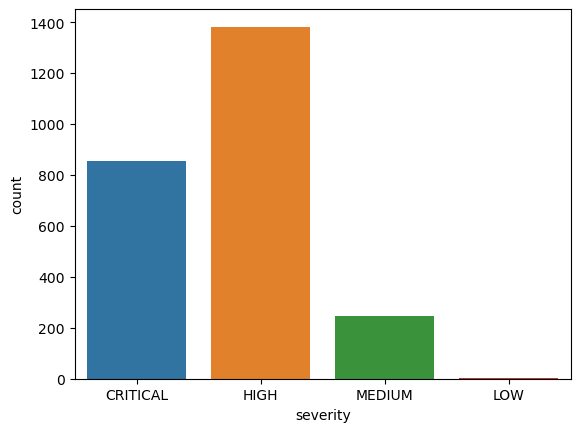

In [40]:
graph1 = sns.countplot(x='severity', data=data)

## Столбчатая диаграмма, отражающая кол-во уязвимостей по их сложности

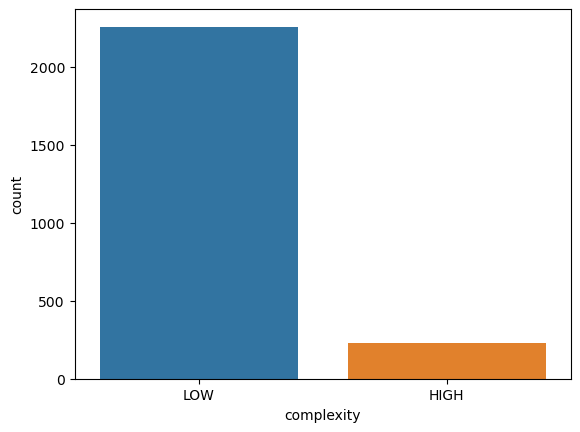

In [41]:
graph1 = sns.countplot(x='complexity', data=data)

## Круговая диаграмма, отражающая процентное соотношение продуктов по кол-ву уязвимостей

/tmp/ipykernel_4141/1879107943.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big_product_totals = big_product_totals.append(small_sums)


<Axes: >

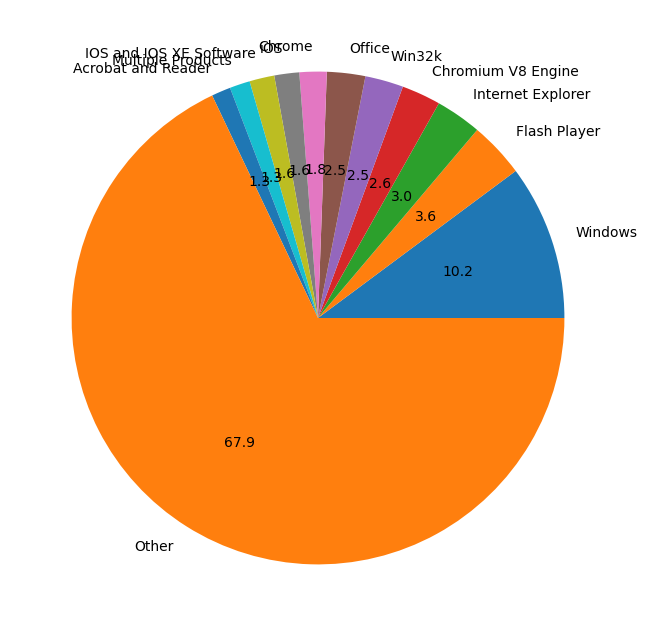

In [42]:
fig = plt.figure(figsize=(10, 8))
data_of_products = data['product'].value_counts()
# продукты, имеющие кол-во уязвимостей меньше 11 попадают в категорию "Other"
small_product_totals = data_of_products[data_of_products < 50]
big_product_totals = data_of_products[data_of_products >= 50]
small_sums = pd.Series([small_product_totals.sum()], index=["Other"])
big_product_totals = big_product_totals.append(small_sums)
big_product_totals.plot(kind="pie", label="", autopct='%.1f')

## Столбчатая диаграмма, отражающая кол-во `CVSS (Common Vulnerability Scoring System)`

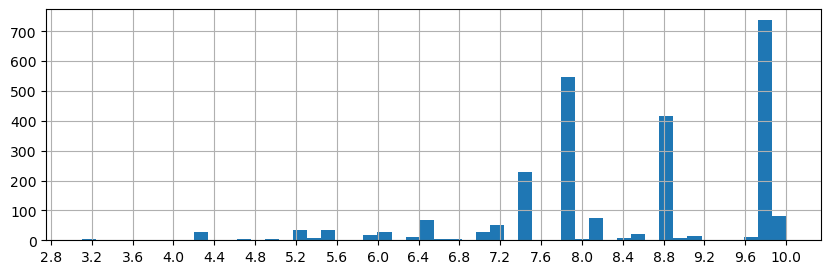

In [43]:
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot()
ax.grid()
line1 = ax.hist(data['cvss'], 50)
ax.xaxis.set_major_locator(MultipleLocator(base=0.4))

## Линейный график, отражающий сложность (complexity) к cvss

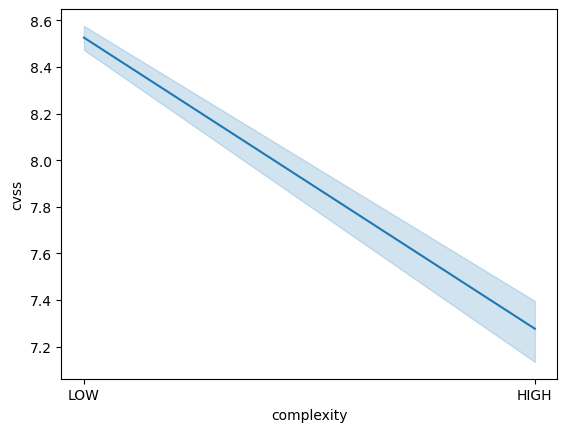

In [44]:
x = sns.lineplot(data=data, x="complexity", y="cvss")

## Столбчатая диаграмма, отражающая кол-во групп уязвимостей (grp)

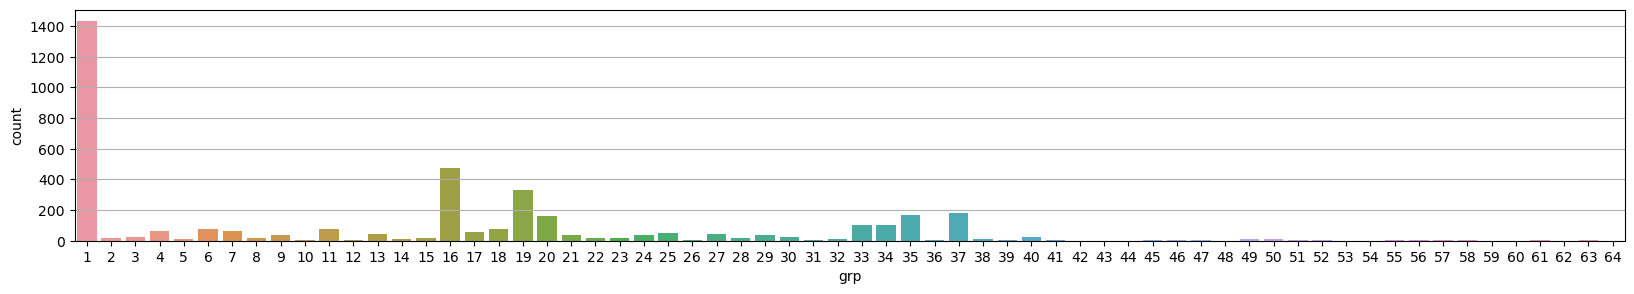

In [45]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot()
ax.grid()
graph = sns.countplot(x='grp', data=data)

## 

## Область уязвимости (vector) к её cvss

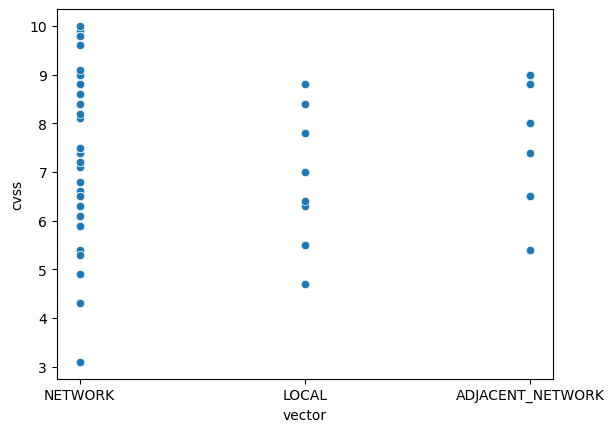

In [46]:
x = sns.scatterplot(data=data, x="vector", y="cvss")

# Наиболее опасные сетевые уязвимости

In [47]:
data_network = data.sort_values(by='cvss', ascending=False)
max_cvss = data_network.head(1)['cvss'].array[0]
most_dangerous = data_network[data['vector'] == 'NETWORK'][data['cvss'] == max_cvss]
most_dangerous.head(3)

/tmp/ipykernel_4141/3731297976.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  most_dangerous = data_network[data['vector'] == 'NETWORK'][data['cvss'] == max_cvss]


,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
2744,CVE-2019-7609,elastic,Kibana,Kibana Arbitrary Code Execution,2022-01-10,Kibana contain an arbitrary code execution fla...,Apply updates per vendor instructions.,2022-07-10,NaN,6,2019-03-25,10.0,CWE-94,NETWORK,LOW,CRITICAL
676,CVE-2019-11708,mozilla,Firefox and Thunderbird,Mozilla Firefox and Thunderbird Sandbox Escape...,2022-05-23,Mozilla Firefox and Thunderbird contain a sand...,Apply updates per vendor instructions.,2022-06-13,NaN,33,2019-07-23,10.0,CWE-20,NETWORK,LOW,CRITICAL
223,CVE-2019-11510,pulse secure,Pulse Connect Secure,Pulse Connect Secure VPN arbitrary file readin...,2021-11-03,An unauthenticated remote attacker can send a ...,Apply updates per vendor instructions.,2021-04-23,NaN,1,2019-05-08,10.0,CWE-22,NETWORK,LOW,CRITICAL


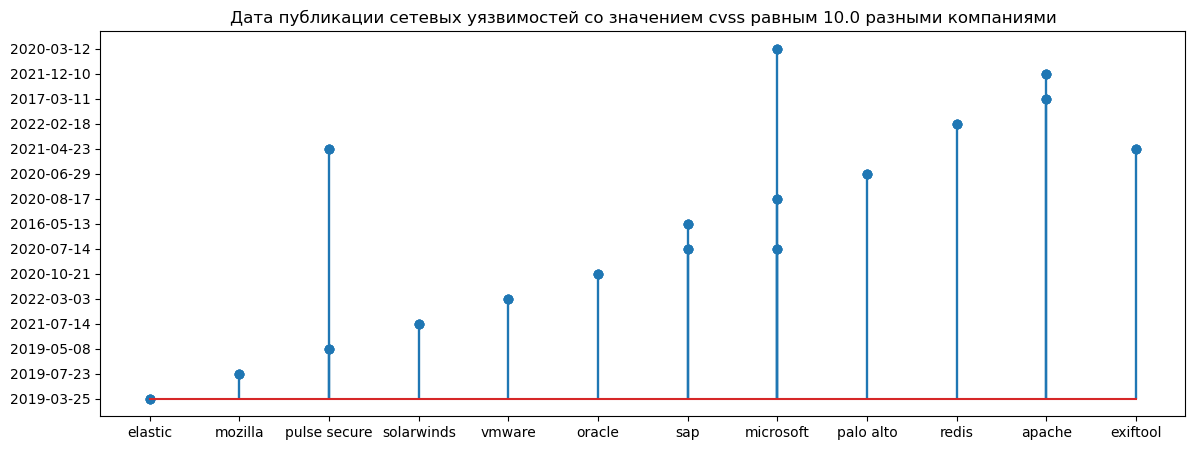

In [48]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot()
plt.title("Дата публикации сетевых уязвимостей со значением cvss равным 10.0 разными компаниями")
line2 = ax.stem(most_dangerous['vendor_project'], most_dangerous['pub_date'])